<a href="https://colab.research.google.com/github/Chenjing2022/Chenjing2022/blob/main/8_3_Testing_for_normal_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing for normal distribution 
---
In the correlation and visualisation worksheets, you learnt how to perform a linear regression to get a line of best fit. This line is frequently used to predict future trends BUT...

When you prepare data for statistical analysis, before you can decide which tests you do, first you have to check whether the data's distribution is normal. 

Linear regressions rely on the assumption that the data is normally distributed. If the data is not, the linear regression's results are not meaningful. 

## What is normal distribution?
---

Normal distribution can be defined as the following bell curve:

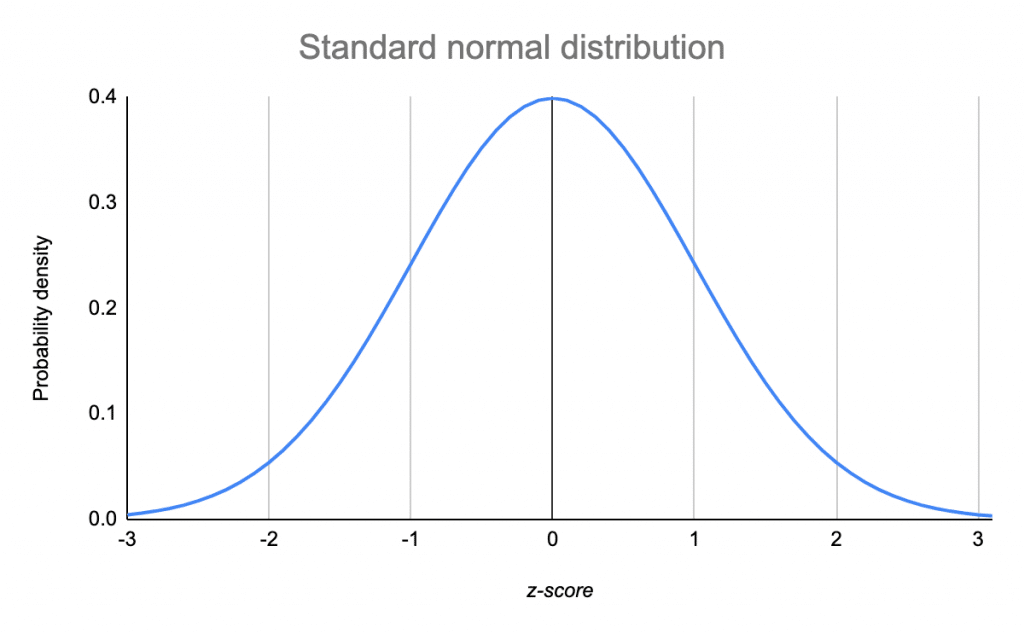

* The above diagram shows a theoretical normally distributed bell curve which can be compared to the actual data. If the actual data's distribution (curve) and the theoretical curve's distribution (bell curve) are statistically the same, it is considered normally distributed. 

* If data is **Gaussian** (normally distributed) then you can use **parametric** statistical analysis such as tests which compare means or predictive lines of best fit. If you use these tests on non-Gaussian data then these types of analysis may have little meaning. 


## How to test for normality
---

There are 2 types of test you can do - **graphical** and **statistical**:  

Graphical (visual) normality tests include:  

* Histogram 
* Probablity plot

You can also do statistical tests, but for now we will just look at visual checks of the datasets. If you would like to read in more detail please see: 
[Python tutorial](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)  or  
[Detailed presentation on theory](http://webspace.ship.edu/pgmarr/Geo441/Lectures/Lec%205%20-%20Normality%20Testing.pdf)  


### Exercise 1 - Histogram check 
---
For this exercise please use the Psychological Wellbeing dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* Load in necessary libraries (pandas and matplotlib.pyplot) 
* Load in and check the data for missing values (try .info() .describe() )
* Familiarise yourself with the data 
* Plot a histogram of Resilliance (plt.hist(data)) 
* Look at the shape of the data - does it look normally distributed?

Test Output:
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB
```

```
	Age	Ukresidence	MAAS	Resilliance	Wellbeing	Stress	selfesteem	LoC	sleep	Year
count	44.000000	44.000000	44.000000	44.000000	44.000000	44.000000	44.000000	44.000000	44.000000	44.0
mean	26.568182	8.193182	3.788636	34.681818	24.113636	21.659091	19.022727	12.045455	20.727273	2017.0
std	8.968673	11.121536	0.866824	6.461956	7.421577	7.935622	5.534201	5.709863	8.420251	0.0
min	14.000000	0.000000	2.300000	18.000000	7.000000	3.000000	7.000000	4.000000	4.000000	2017.0
25%	22.750000	0.000000	3.225000	30.000000	20.000000	18.500000	17.000000	8.000000	12.750000	2017.0
50%	24.000000	1.500000	3.915000	35.000000	25.500000	21.500000	19.000000	11.500000	23.500000	2017.0
75%	26.250000	19.750000	4.325000	39.250000	28.250000	28.000000	22.250000	16.000000	28.000000	2017.0
max	74.000000	30.000000	6.700000	47.000000	38.000000	37.000000	30.000000	27.000000	32.000000	2017.0
```
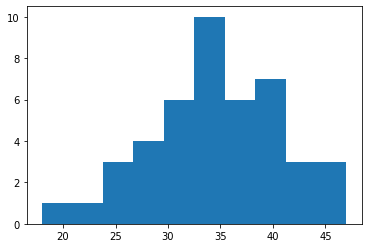


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url )
df.info()
df.describe() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB


,Age,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,26.568182,8.193182,3.788636,34.681818,24.113636,21.659091,19.022727,12.045455,20.727273,2017.0
std,8.968673,11.121536,0.866824,6.461956,7.421577,7.935622,5.534201,5.709863,8.420251,0.0
min,14.000000,0.000000,2.300000,18.000000,7.000000,3.000000,7.000000,4.000000,4.000000,2017.0
25%,22.750000,0.000000,3.225000,30.000000,20.000000,18.500000,17.000000,8.000000,12.750000,2017.0
50%,24.000000,1.500000,3.915000,35.000000,25.500000,21.500000,19.000000,11.500000,23.500000,2017.0
75%,26.250000,19.750000,4.325000,39.250000,28.250000,28.000000,22.250000,16.000000,28.000000,2017.0
max,74.000000,30.000000,6.700000,47.000000,38.000000,37.000000,30.000000,27.000000,32.000000,2017.0


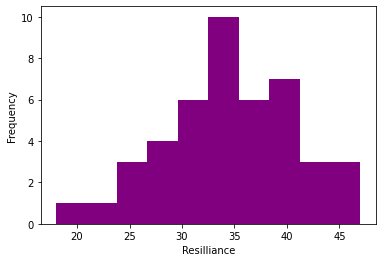

In [ ]:
df = df["Resilliance"]
plt.hist(df)
plt.xlabel("Resilliance") 
plt.ylabel("Frequency")
plt.hist(df, color = 'purple')
plt.show()

### Exercise 2 - Probability Plot
---

As you can see in Exercise 1, it is not entirely obvious whether the data is actually normally distributed, even if it has the rough shape...  

Therefore, we need to do a second check

To perform the probability plot we need to load in another library:  
`from scipy import stats` 

* Make a probability plot of the above data 

` stats.probplot(data, plot = plt)` 

* Look at the plot, are the dots following the line?
* If the plot shows a straight line of dots it suggests the data is Gaussian! 

As we mentioned earlier, when checking for normality, we look to see how the actual data compares to a theoretical line or graph if that data was normally distributed. If the dots (actual data) follow the theoretical line on the plot, it shows the 2 are similar and therefore normally distributed. 

Test output:

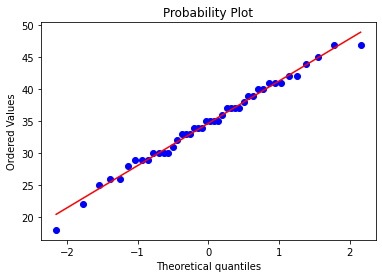

((array([-2.15374952, -1.77530174, -1.55088744, -1.38514138, -1.25057432,
         -1.1354892 , -1.03375442, -0.94172868, -0.85705923, -0.7781294 ,
         -0.70377435, -0.63312213, -0.5654989 , -0.50036931, -0.43729746,
         -0.3759202 , -0.31592847, -0.25705362, -0.19905725, -0.14172333,
         -0.08485191, -0.02825382,  0.02825382,  0.08485191,  0.14172333,
          0.19905725,  0.25705362,  0.31592847,  0.3759202 ,  0.43729746,
          0.50036931,  0.5654989 ,  0.63312213,  0.70377435,  0.7781294 ,
          0.85705923,  0.94172868,  1.03375442,  1.1354892 ,  1.25057432,
          1.38514138,  1.55088744,  1.77530174,  2.15374952]),
  array([18, 22, 25, 26, 26, 28, 29, 29, 29, 30, 30, 30, 30, 31, 32, 33, 33,
         33, 34, 34, 34, 35, 35, 35, 35, 36, 37, 37, 37, 37, 38, 39, 39, 40,
         40, 41, 41, 41, 42, 42, 44, 45, 47, 47])),
 (6.612420657288927, 34.68181818181818, 0.9942065542657863))

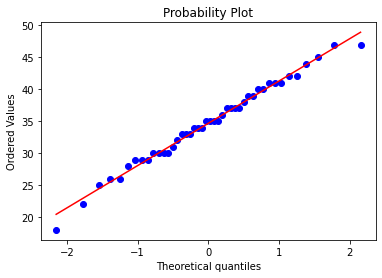

In [ ]:
from scipy import stats
stats.probplot(df, plot = plt)

### Exercise 3 -  Histogram of non-Gaussian data 
---
For this exercise use the US election data: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Data%20Cleaning%20Data%20Sets/presDirty.csv"  

* Load in and check the data for missing values
* Use dropna() if needed
* Familiarise yourself with the data
* Plot a histogram of national_turnout
* Look at the shape of the data - does it look normally distributed?

Test Output:  

``` 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cycle                       59 non-null     int64  
 1   branch                      59 non-null     object 
 2   model                       59 non-null     object 
 3   modeldate                   59 non-null     object 
 4   candidate_inc               59 non-null     object 
 5   candidate_chal              59 non-null     object 
 6   nat_voteshare_other_hi      59 non-null     float64
 7   national_voteshare_inc_lo   59 non-null     float64
 8   national_voteshare_chal_lo  59 non-null     float64
 9   national_voteshare_3rd_lo   0 non-null      float64
 10  nat_voteshare_other_lo      59 non-null     float64
 11  national_turnout            59 non-null     float64
 12  national_turnout_hi         59 non-null     float64
 13  national_turnout_lo         59 non-null     float64
 14  timestamp                   59 non-null     object 
 15  simulations                 59 non-null     int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 7.8+ KB
```

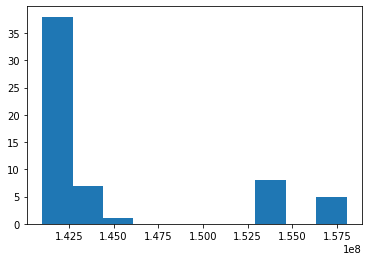




In [ ]:
#Check the data for the null values
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Data%20Cleaning%20Data%20Sets/presDirty.csv"
df = pd.read_csv(url )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cycle                       156 non-null    int64  
 1   branch                      156 non-null    object 
 2   model                       156 non-null    object 
 3   modeldate                   156 non-null    object 
 4   candidate_inc               156 non-null    object 
 5   candidate_chal              156 non-null    object 
 6   nat_voteshare_other_hi      156 non-null    float64
 7   national_voteshare_inc_lo   156 non-null    float64
 8   national_voteshare_chal_lo  156 non-null    float64
 9   national_voteshare_3rd_lo   0 non-null      float64
 10  nat_voteshare_other_lo      156 non-null    float64
 11  national_turnout            59 non-null     float64
 12  national_turnout_hi         59 non-null     float64
 13  national_turnout_lo         59 non-

In [ ]:
# Drop the null values
new_df = df.dropna(subset = ["national_turnout"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cycle                       59 non-null     int64  
 1   branch                      59 non-null     object 
 2   model                       59 non-null     object 
 3   modeldate                   59 non-null     object 
 4   candidate_inc               59 non-null     object 
 5   candidate_chal              59 non-null     object 
 6   nat_voteshare_other_hi      59 non-null     float64
 7   national_voteshare_inc_lo   59 non-null     float64
 8   national_voteshare_chal_lo  59 non-null     float64
 9   national_voteshare_3rd_lo   0 non-null      float64
 10  nat_voteshare_other_lo      59 non-null     float64
 11  national_turnout            59 non-null     float64
 12  national_turnout_hi         59 non-null     float64
 13  national_turnout_lo         59 non-nu

In [ ]:
# Familiarise with the data
new_df.describe()

,cycle,nat_voteshare_other_hi,national_voteshare_inc_lo,national_voteshare_chal_lo,national_voteshare_3rd_lo,nat_voteshare_other_lo,national_turnout,national_turnout_hi,national_turnout_lo,simulations
count,59.0,59.000000,59.000000,59.000000,0.0,59.000000,5.900000e+01,5.900000e+01,5.900000e+01,59.0
mean,2020.0,1.940187,42.275468,49.681179,NaN,0.692869,1.445031e+08,1.545415e+08,1.343265e+08,40000.0
std,0.0,0.054300,0.309478,0.819343,NaN,0.013218,5.992601e+06,6.079481e+06,5.684473e+06,0.0
min,2020.0,1.835479,41.810360,48.262330,NaN,0.673267,1.410000e+08,1.510000e+08,1.310000e+08,40000.0
25%,2020.0,1.901337,42.062010,48.978215,NaN,0.680240,1.410000e+08,1.510000e+08,1.310000e+08,40000.0
50%,2020.0,1.935287,42.159790,49.578820,NaN,0.693078,1.410000e+08,1.510000e+08,1.310000e+08,40000.0
75%,2020.0,1.986722,42.417320,50.498645,NaN,0.699047,1.430000e+08,1.530000e+08,1.330000e+08,40000.0
max,2020.0,2.030350,42.980960,50.880250,NaN,0.724433,1.580448e+08,1.684974e+08,1.475607e+08,40000.0


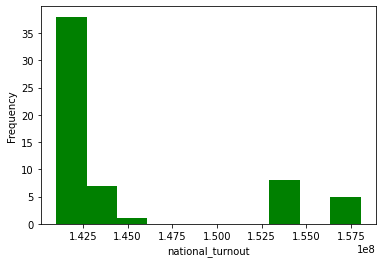

In [ ]:
# Plot a histogram of national_turnout
df1= new_df["national_turnout"]
plt.hist(df1)
plt.xlabel("national_turnout") 
plt.ylabel("Frequency")
plt.hist(df1, color = 'green')
plt.show()

The above chart does not look normally distributed.

### Exercise 4 - Prob plot of non-Gaussian data 
---

* Using stats.probplot() make a probability plot of national_turnout
* Does the data look normally distributed?

Expected Output:

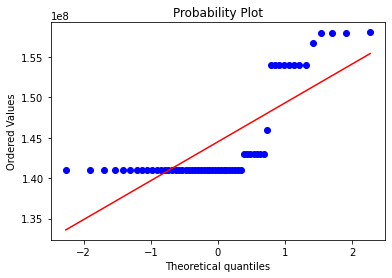

((array([-2.26751093, -1.90574552, -1.6934328 , -1.53794117, -1.41266963,
         -1.30632291, -1.21299259, -1.12917851, -1.05262603, -0.98179205,
         -0.91557053, -0.85313927, -0.79386855, -0.73726396, -0.68292896,
         -0.63053958, -0.57982669, -0.53056337, -0.48255566, -0.43563558,
         -0.38965586, -0.34448587, -0.30000832, -0.25611675, -0.21271332,
         -0.16970714, -0.1270127 , -0.08454864, -0.04223656,  0.        ,
          0.04223656,  0.08454864,  0.1270127 ,  0.16970714,  0.21271332,
          0.25611675,  0.30000832,  0.34448587,  0.38965586,  0.43563558,
          0.48255566,  0.53056337,  0.57982669,  0.63053958,  0.68292896,
          0.73726396,  0.79386855,  0.85313927,  0.91557053,  0.98179205,
          1.05262603,  1.12917851,  1.21299259,  1.30632291,  1.41266963,
          1.53794117,  1.6934328 ,  1.90574552,  2.26751093]),
  array([1.41000000e+08, 1.41000000e+08, 1.41000000e+08, 1.41000000e+08,
         1.41000000e+08, 1.41000000e+08, 1.4100000

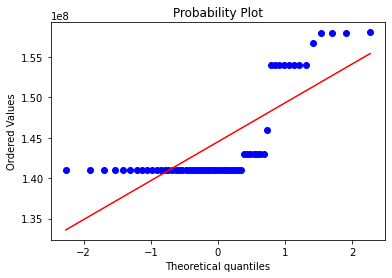

In [ ]:
from scipy import stats
stats.probplot(df1, plot = plt)

The above plot does not look normally distributed.

### Exercise 5 - Linear regression on normal data 
---

Referring back to the correlation and visualisation worksheets and using the wellbeing dataset:

* Perform a linear regression (stats.linregress) to find a line of best fit between Resilliance (x) and selfesteem (y)
* Note as our y values are what we are observing (eg affecting) they do not need to be normally distributed, BUT for a meaningful result the x values do
* Plot a scatterplot with line of best fit 

Expected Output:

LinregressResult(slope=0.5064300541744722, intercept=1.4588122120398985, rvalue=0.5913281212034439, pvalue=2.3709886829858514e-05, stderr=0.10656964988997152)  

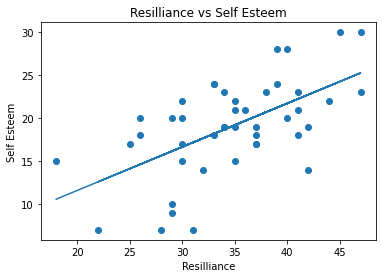

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB


,Age,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,26.568182,8.193182,3.788636,34.681818,24.113636,21.659091,19.022727,12.045455,20.727273,2017.0
std,8.968673,11.121536,0.866824,6.461956,7.421577,7.935622,5.534201,5.709863,8.420251,0.0
min,14.000000,0.000000,2.300000,18.000000,7.000000,3.000000,7.000000,4.000000,4.000000,2017.0
25%,22.750000,0.000000,3.225000,30.000000,20.000000,18.500000,17.000000,8.000000,12.750000,2017.0
50%,24.000000,1.500000,3.915000,35.000000,25.500000,21.500000,19.000000,11.500000,23.500000,2017.0
75%,26.250000,19.750000,4.325000,39.250000,28.250000,28.000000,22.250000,16.000000,28.000000,2017.0
max,74.000000,30.000000,6.700000,47.000000,38.000000,37.000000,30.000000,27.000000,32.000000,2017.0


In [103]:
from scipy.stats import linregress
x = df["Resilliance"]
y = df["selfesteem"]
regression =  linregress(x,y)
regression

LinregressResult(slope=0.5064300541744722, intercept=1.4588122120398985, rvalue=0.5913281212034439, pvalue=2.3709886829858514e-05, stderr=0.10656964988997152)

In [104]:
print(regression.slope)
print(regression.intercept)
print(regression.rvalue**2)
print(regression.pvalue)

0.5064300541744722
1.4588122120398985
0.3496689469259949
2.3709886829858514e-05


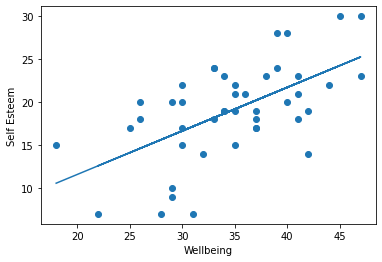

In [105]:
x = df["Resilliance"]
y = df["selfesteem"]
plt.scatter(x,y)
plt.scatter
plt.xlabel("Wellbeing")
plt.ylabel("Self Esteem")
regression = linregress(x,y) 
slope = regression.slope
intercept = regression.intercept
plt.plot(x, slope*x + intercept)

plt.show()